<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Aperçu-des-données-nutritionnelles" data-toc-modified-id="Aperçu-des-données-nutritionnelles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aperçu des données nutritionnelles</a></span><ul class="toc-item"><li><span><a href="#Découvrir-des-exemples-de-produits-par-nutriscore" data-toc-modified-id="Découvrir-des-exemples-de-produits-par-nutriscore-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Découvrir des exemples de produits par nutriscore</a></span></li></ul></li><li><span><a href="#Analyse-des-données" data-toc-modified-id="Analyse-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse des données</a></span><ul class="toc-item"><li><span><a href="#Univariée:-Visualisation-du-remplissage-des-nutriscores" data-toc-modified-id="Univariée:-Visualisation-du-remplissage-des-nutriscores-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Univariée: Visualisation du remplissage des nutriscores</a></span></li><li><span><a href="#Analyse-bivariée" data-toc-modified-id="Analyse-bivariée-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analyse bivariée</a></span></li></ul></li><li><span><a href="#Analyse-multivariée-:-ACP" data-toc-modified-id="Analyse-multivariée-:-ACP-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyse multivariée : ACP</a></span></li></ul></div>

In [156]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, Button, Label
import ipywidgets as widgets
from ipywidgets import Layout, HBox, VBox


from IPython.display import Image, HTML
from IPython.display import display as disp
from IPython import display

from IPython.display import Image, HTML
from IPython.display import display as disp

#from zipfile import ZipFile, Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import voila
import streamlit as st
import time
import threading

import statsmodels.api as sm
import plotly.graph_objects as go
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from functions import *

import warnings
warnings.filterwarnings('ignore')

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'



import ipywidgets as widgets
from ipywidgets import interact, interact_manual
#interact(f, x=10)

In [123]:
data_load = pd.read_csv("./data/PGclean_data.csv",low_memory=False) #index_col="product_name"
print("Des données optimisées d'OpenFoodFacts sont chargées avec succes")
#remove the indices exported in the notebook01 (keeping track of orignal indices of products)
data_load=data_load[["fat_100g", "sugars_100g", "fiber_100g", "proteins_100g","energy_100g","nutriscore_score","nutriscore_grade","product_name"]]



Des données optimisées d'OpenFoodFacts sont chargées avec succes


In [124]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(y=[2, 1, 4, 3]))
# fig.add_trace(go.Bar(y=[1, 4, 3, 2]))
# fig.update_layout(title = 'Hello Figure')
# fig.show()

# Aperçu des données nutritionnelles #


Visualisez le type de données nettoyées:

In [125]:
data_load.head(5)

,fat_100g,sugars_100g,fiber_100g,proteins_100g,energy_100g,nutriscore_score,nutriscore_grade,product_name
0,0.0,14.0,0.20,0.5,259.0,9.0,d,Jus de sureau
1,15.0,33.2,0.90,4.1,1565.0,14.0,d,"8 Mini muffins, cœur fondant au fruits rouges"
2,56.0,0.9,0.10,7.5,2276.0,21.0,e,Foie gras de canard entier du Sud-Ouest
3,29.1,0.6,0.44,13.5,1372.0,21.0,e,Terrine de campagne pur porc
4,30.0,0.0,0.00,32.0,1682.0,17.0,d,Copeaux Parmigiano Reggiano


## Découvrir des exemples de produits par nutriscore ##

Sélectionnez le nutriscore (entre A et E), pour voir une liste de produits

In [126]:
pd.set_option('display.max_rows', None)


def update_df_length(limit_case,nutriscore):  #int #pd.dataframe
    #data_load = pd.read_csv("./data/PGclean_data.csv",low_memory=False)
    if nutriscore == 'tous':
        disp(data_load.head(limit_case)) #limit
    else:
        disp(data_load[data_load['nutriscore_grade']==nutriscore].head(limit_case))
    
    print('Nombre de produits affichés: {}  nutriscore: {}'.format(limit_case,nutriscore))
    
interact(update_df_length, limit_case=widgets.IntSlider(min=0, max=1000, description='Nb produits:',step=1, value=5),nutriscore=['tous','a','b','c','d','e'])

interactive(children=(IntSlider(value=5, description='Nb produits:', max=1000), Dropdown(description='nutrisco…

<function __main__.update_df_length(limit_case, nutriscore)>

# Analyse des données #
## Univariée: Visualisation du remplissage des nutriscores ##

Text(0.5, 1.0, "distribution des nutriscores sur l'echantillon")

Text(0.5, 0, 'valeur des nutriscores')

Text(0, 0.5, 'frequence')

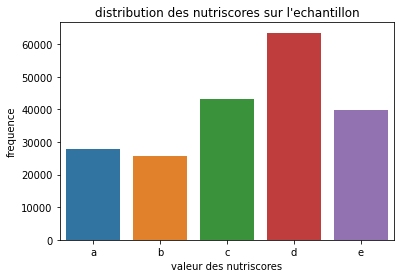

In [127]:
# Imprimer les principaux éléments de statistiques
ybars=[data_load[data_load['nutriscore_grade']=='a'].shape[0], data_load[data_load['nutriscore_grade']=='b'].shape[0], data_load[data_load['nutriscore_grade']=='c'].shape[0], data_load[data_load['nutriscore_grade']=='d'].shape[0], data_load[data_load['nutriscore_grade']=='e'].shape[0]]
xbars=['a','b','c','d','e']
# plt.title("distribution des nutriscores sur l'echantillon")
# #plt.xlabel("valeur des nutriscores")
# #plt.ylabel("frequence")
# #plt.xticks(range(5))
# disp(plt.bar(xbars, ybars))


# fig = go.Figure()
# fig.add_trace(go.Bar(x= xbars, y=ybars))
# fig.update_layout(title = 'distribution des nutriscores sur l\'echantillon')
# fig.show()

ax = sns.barplot(x=xbars,
                y=ybars)

plt.title('distribution des nutriscores sur l\'echantillon')
plt.xlabel("valeur des nutriscores")
plt.ylabel("frequence")
plt.show()

## Analyse bivariée ##

Commençons par comparer les variables 2 à 2 pour saisir les relations potentielles entre elles. Nous affichons, ci-dessous, les produits alimentaires de manière colorée selon la valeur de leur nutriscore (A,B,C,D,E). 

In [132]:
def update_bivarie(sample_size): 
    print("Nutriscore_grade relation en fonction de chaque variable: ")
    ax=sns.pairplot(data_load.sample(sample_size,random_state=0).sort_values(by="nutriscore_grade"),hue="nutriscore_grade")
    plt.show()
    
    
interact(update_bivarie, sample_size=widgets.IntSlider(min=200, max=2000, description='taille echantillon',step=10, value=700))

interactive(children=(IntSlider(value=700, description='taille echantillon', max=2000, min=200, step=10), Outp…

<function __main__.update_bivarie(sample_size)>

# Analyse multivariée : ACP #

Dans cette partie, il sera possible de :
- choisir le nombre de composantes principales pour projeter les variables 
- choisir la taille de l'échantillon de produits à projeter sur les axes précédemment calculés. 


In [155]:
#chargement de l'ensemble des données numériques du tableau de données dans le calcul du PCA
# les données disponibles dans ce jeu de données n'est que de 200000 produits relativement représentatifs de l'ensemble des données
# disponibles et nettoyées
# n_comp=4 #sur ce jeu de données le nombre de composantes principales ayant un intéret est 2
# n_data_pca= 800
# n_produits_projetes= 500

def compute_pca(n_comp=4,n_data_pca=800,n_produits_projetes=500 ):
    data_pca_sample = data_load.sample(n_data_pca,random_state=0)

    data_pca = data_pca_sample[["fat_100g", "sugars_100g",  "proteins_100g","energy_100g","nutriscore_score"]]
    #data_pca = data_pca.dropna()

    print('taille de l\'echantillon de données pour le PCA: {}'.format(data_pca.shape))

    X= data_pca.values
    names = data_pca_sample[["nutriscore_grade"]]
    features = data_pca.columns


    # Centrage et Réduction
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)

    # Calcul des composantes principales
    pca = decomposition.PCA(n_components=n_comp)
    pca.fit(X_scaled)

    # Eboulis des valeurs propres
    display_scree_plot(pca)

    # Cercle des corrélations
    pcs = pca.components_
    display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5),(6,7)], labels = np.array(features))

    X_projected = pca.transform(X_scaled)
    if n_produits_projetes <X.shape[0]-1:
        print('taille de l\'échantillon de produits projetés: {}'.format(X_projected[0:(n_produits_projetes-1)].shape))
        display_factorial_planes(X_projected[0:(n_produits_projetes-1)], n_comp, pca, [(0,1),(2,3),(4,5),(6,7)], illustrative_var = names[0:(n_produits_projetes-1)] )  

    else:
        print('le nombre de produits projetés est trop importants par rapport à la taille de l\'echantillon de données du pca')

    plt.show()
    
interact(compute_pca, n_comp=widgets.IntSlider(min=2, max=4, description='nb comp principale',step=2, value=4), n_data_pca=widgets.IntSlider(min=400, max=2000, description='size data sample',step=1, value=800), n_produits_projetes=widgets.IntSlider(min=100, max=3000, description='nb produit projetes',step=1, value=500))


interactive(children=(IntSlider(value=4, description='nb comp principale', max=6, min=2, step=2), IntSlider(va…

<function __main__.compute_pca(n_comp=4, n_data_pca=800, n_produits_projetes=500)>

<Figure size 504x432 with 0 Axes>

<Figure size 504x432 with 0 Axes>

<Figure size 504x432 with 0 Axes>